<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Python/algotrading/frequency_table_using_zigzag_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data download from yahoo finance

/tmp/ipython-input-2735044596.py:53: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2735044596.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-2735044596.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])


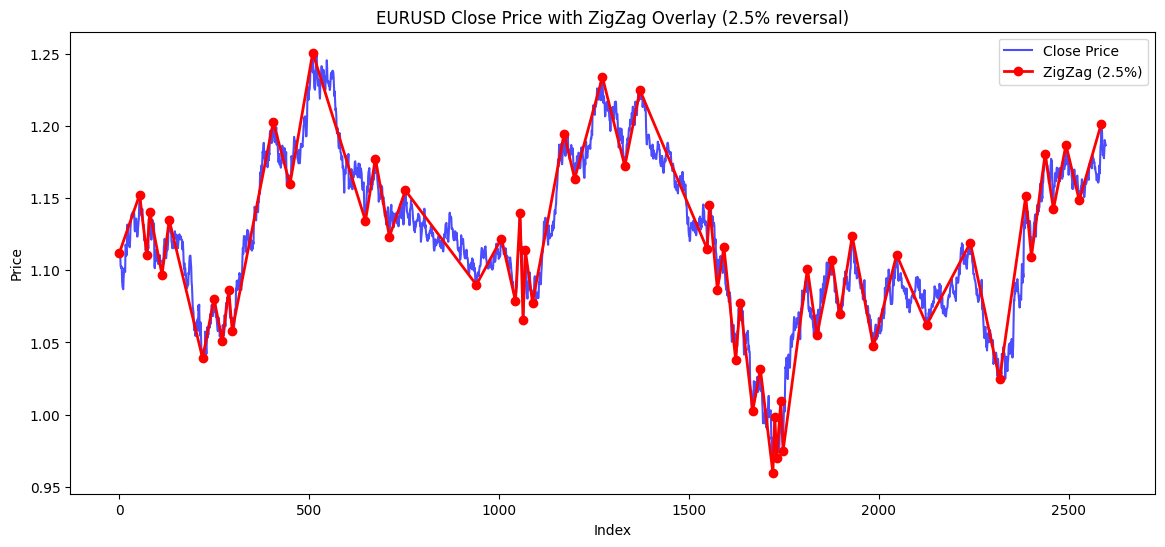

/tmp/ipython-input-2735044596.py:53: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2735044596.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-2735044596.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])


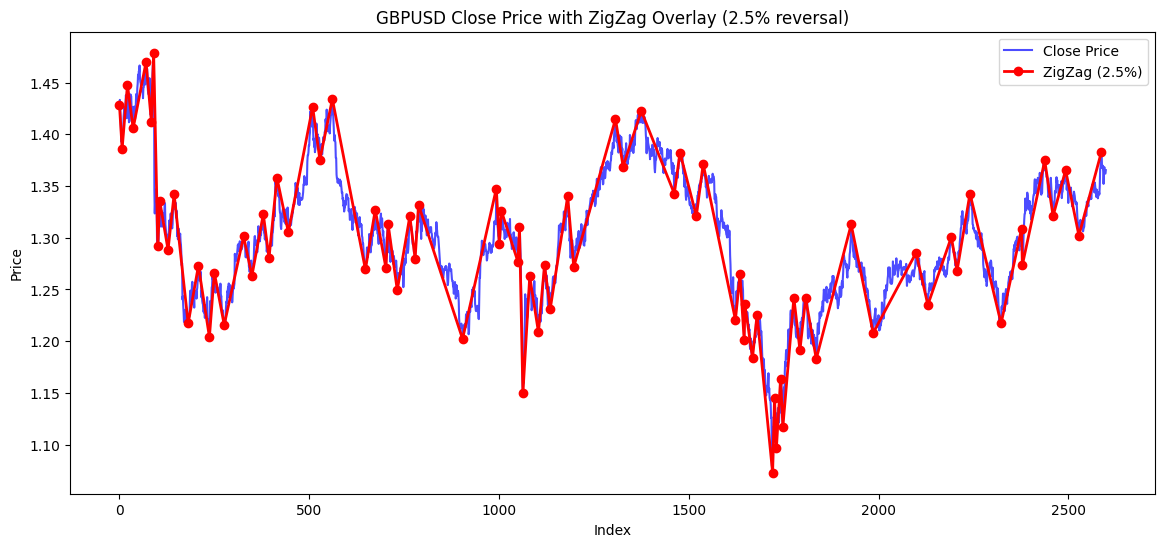

/tmp/ipython-input-2735044596.py:53: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2735044596.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-2735044596.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])


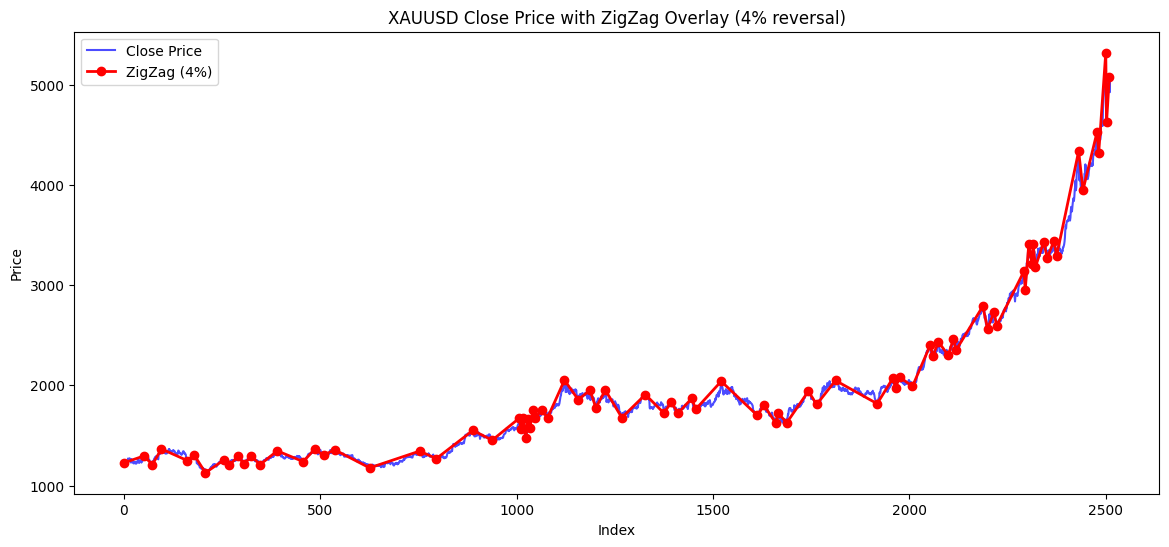

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def zigzag(close, percent):
    percent = percent / 100
    pivots = [0]  # store indices of pivots
    last_pivot = float(close.iloc[0])
    last_pivot_idx = 0
    trend = 0  # 1 for up, -1 for down, 0 for undefined

    for i in range(1, len(close)):
        current_price = float(close.iloc[i])
        change = (current_price - last_pivot) / last_pivot
        if trend == 0:
            if abs(change) >= percent:
                trend = 1 if change > 0 else -1
                last_pivot = current_price
                last_pivot_idx = i
                pivots.append(i)
        elif trend == 1:
            if current_price > last_pivot:
                last_pivot = current_price
                last_pivot_idx = i
                pivots[-1] = i
            elif (last_pivot - current_price) / last_pivot >= percent:
                trend = -1
                last_pivot = current_price
                last_pivot_idx = i
                pivots.append(i)
        elif trend == -1:
            if current_price < last_pivot:
                last_pivot = current_price
                last_pivot_idx = i
                pivots[-1] = i
            elif (current_price - last_pivot) / last_pivot >= percent:
                trend = 1
                last_pivot = current_price
                last_pivot_idx = i
                pivots.append(i)
    return pivots

# Settings_________________________________________percentage setting is here
tickers = [("EURUSD=X", "EURUSD", 2.5),
           ("GBPUSD=X", "GBPUSD", 2.5),
           ("GC=F", "XAUUSD", 4)]
end_date = datetime.today()
start_date = end_date - timedelta(days=365*10)

for ticker, name, percent in tickers:
    df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
    if df.empty:
        print(f"Failed to download data for {name}")
        continue
    close = df['Close'].dropna().reset_index(drop=True)
    pivots_idx = zigzag(close, percent)
    pivots_idx = np.array(pivots_idx)
    pivots_val = close.iloc[pivots_idx]

    plt.figure(figsize=(14, 6))
    plt.plot(close.index, close.values, label='Close Price', color='blue', alpha=0.7)
    plt.plot(pivots_idx, pivots_val, label=f'ZigZag ({percent}%)', color='red', linewidth=2, marker='o')
    plt.title(f'{name} Close Price with ZigZag Overlay ({percent}% reversal)')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()



In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

def zigzag(close, percent):
    percent = percent / 100
    pivots = []
    last_pivot = float(close.iloc[0])
    trend = 0  # 1 for up, -1 for down, 0 for undefined

    for i in range(1, len(close)):
        current_price = float(close.iloc[i])
        change = (current_price - last_pivot) / last_pivot
        if trend == 0:
            if abs(change) >= percent:
                trend = 1 if change > 0 else -1
                last_pivot = current_price
                pivots.append(current_price)
        elif trend == 1:
            if current_price > last_pivot:
                last_pivot = current_price
            elif (last_pivot - current_price) / last_pivot >= percent:
                trend = -1
                last_pivot = current_price
                pivots.append(current_price)
        elif trend == -1:
            if current_price < last_pivot:
                last_pivot = current_price
            elif (current_price - last_pivot) / last_pivot >= percent:
                trend = 1
                last_pivot = current_price
                pivots.append(current_price)
    return pivots

# Settings for the percentage change
tickers = [("EURUSD=X", "EURUSD", 2.5, 10000, "pipettes"),
           ("GBPUSD=X", "GBPUSD", 2.5, 10000, "pipettes"),
           ("GC=F", "XAUUSD", 4, 1, "dollars")]
end_date = datetime.today()
start_date = end_date - timedelta(days=365*10)

# Binning
bins_fx = list(range(0, 1001, 50)) + [np.inf]
labels_fx = [f"{i}-{i+50}" for i in range(0, 1000, 50)] + ["Above"]

bins_xau = list(range(0, 301, 10)) + [np.inf]
labels_xau = [f"{i}-{i+10}" for i in range(0, 300, 10)] + ["Above"]

for ticker, name, percent, multiplier, unit in tickers:
    df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
    if df.empty:
        print(f"Failed to download data for {name}")
        continue
    close = df['Close'].dropna().reset_index(drop=True)
    pivots = zigzag(close, percent)
    zigzag_diffs = np.abs(np.diff(pivots)) * multiplier
    if name == "XAUUSD":
        bins = bins_xau
        labels = labels_xau
    else:
        bins = bins_fx
        labels = labels_fx
    zigzag_bins = pd.cut(zigzag_diffs, bins=bins, labels=labels, right=False)
    freq_counts = zigzag_bins.value_counts().sort_index()
    freq_percent = freq_counts / freq_counts.sum() * 100

    print(f"\n{name} ZigZag Frequency Table ({percent}% reversal, unit={unit}):")
    print("Range         | Frequency (%)")
    print("------------------------------")
    for rng, pct in zip(freq_percent.index, freq_percent.values):
        print(f"{str(rng):13} | {pct:6.2f}")


/tmp/ipython-input-2795347763.py:51: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2795347763.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-2795347763.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])
/tmp/ipython-input-2795347763.py:51: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 comple


EURUSD ZigZag Frequency Table (2.5% reversal, unit=pipettes):
Range         | Frequency (%)
------------------------------
0-50          |  10.34
50-100        |  13.79
100-150       |   8.62
150-200       |  15.52
200-250       |  15.52
250-300       |  17.24
300-350       |   3.45
350-400       |   3.45
400-450       |   1.72
450-500       |   1.72
500-550       |   1.72
550-600       |   1.72
600-650       |   0.00
650-700       |   0.00
700-750       |   3.45
750-800       |   0.00
800-850       |   1.72
850-900       |   0.00
900-950       |   0.00
950-1000      |   0.00
Above         |   0.00

GBPUSD ZigZag Frequency Table (2.5% reversal, unit=pipettes):
Range         | Frequency (%)
------------------------------
0-50          |  11.11
50-100        |   4.94
100-150       |  13.58
150-200       |  11.11
200-250       |  11.11
250-300       |  12.35
300-350       |   8.64
350-400       |   7.41
400-450       |   1.23
450-500       |   1.23
500-550       |   3.70
550-600       | 


/tmp/ipython-input-2795347763.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-2795347763.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])



XAUUSD ZigZag Frequency Table (4% reversal, unit=dollars):
Range         | Frequency (%)
------------------------------
0-10          |   7.14
10-20         |   5.95
20-30         |   9.52
30-40         |   7.14
40-50         |  10.71
50-60         |   9.52
60-70         |   8.33
70-80         |   8.33
80-90         |   4.76
90-100        |   4.76
100-110       |   0.00
110-120       |   2.38
120-130       |   0.00
130-140       |   0.00
140-150       |   4.76
150-160       |   2.38
160-170       |   2.38
170-180       |   0.00
180-190       |   2.38
190-200       |   1.19
200-210       |   3.57
210-220       |   1.19
220-230       |   1.19
230-240       |   0.00
240-250       |   0.00
250-260       |   0.00
260-270       |   0.00
270-280       |   0.00
280-290       |   0.00
290-300       |   0.00
Above         |   2.38


/tmp/ipython-input-1836308949.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2795347763.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-2795347763.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])
/tmp/ipython-input-1836308949.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 complete

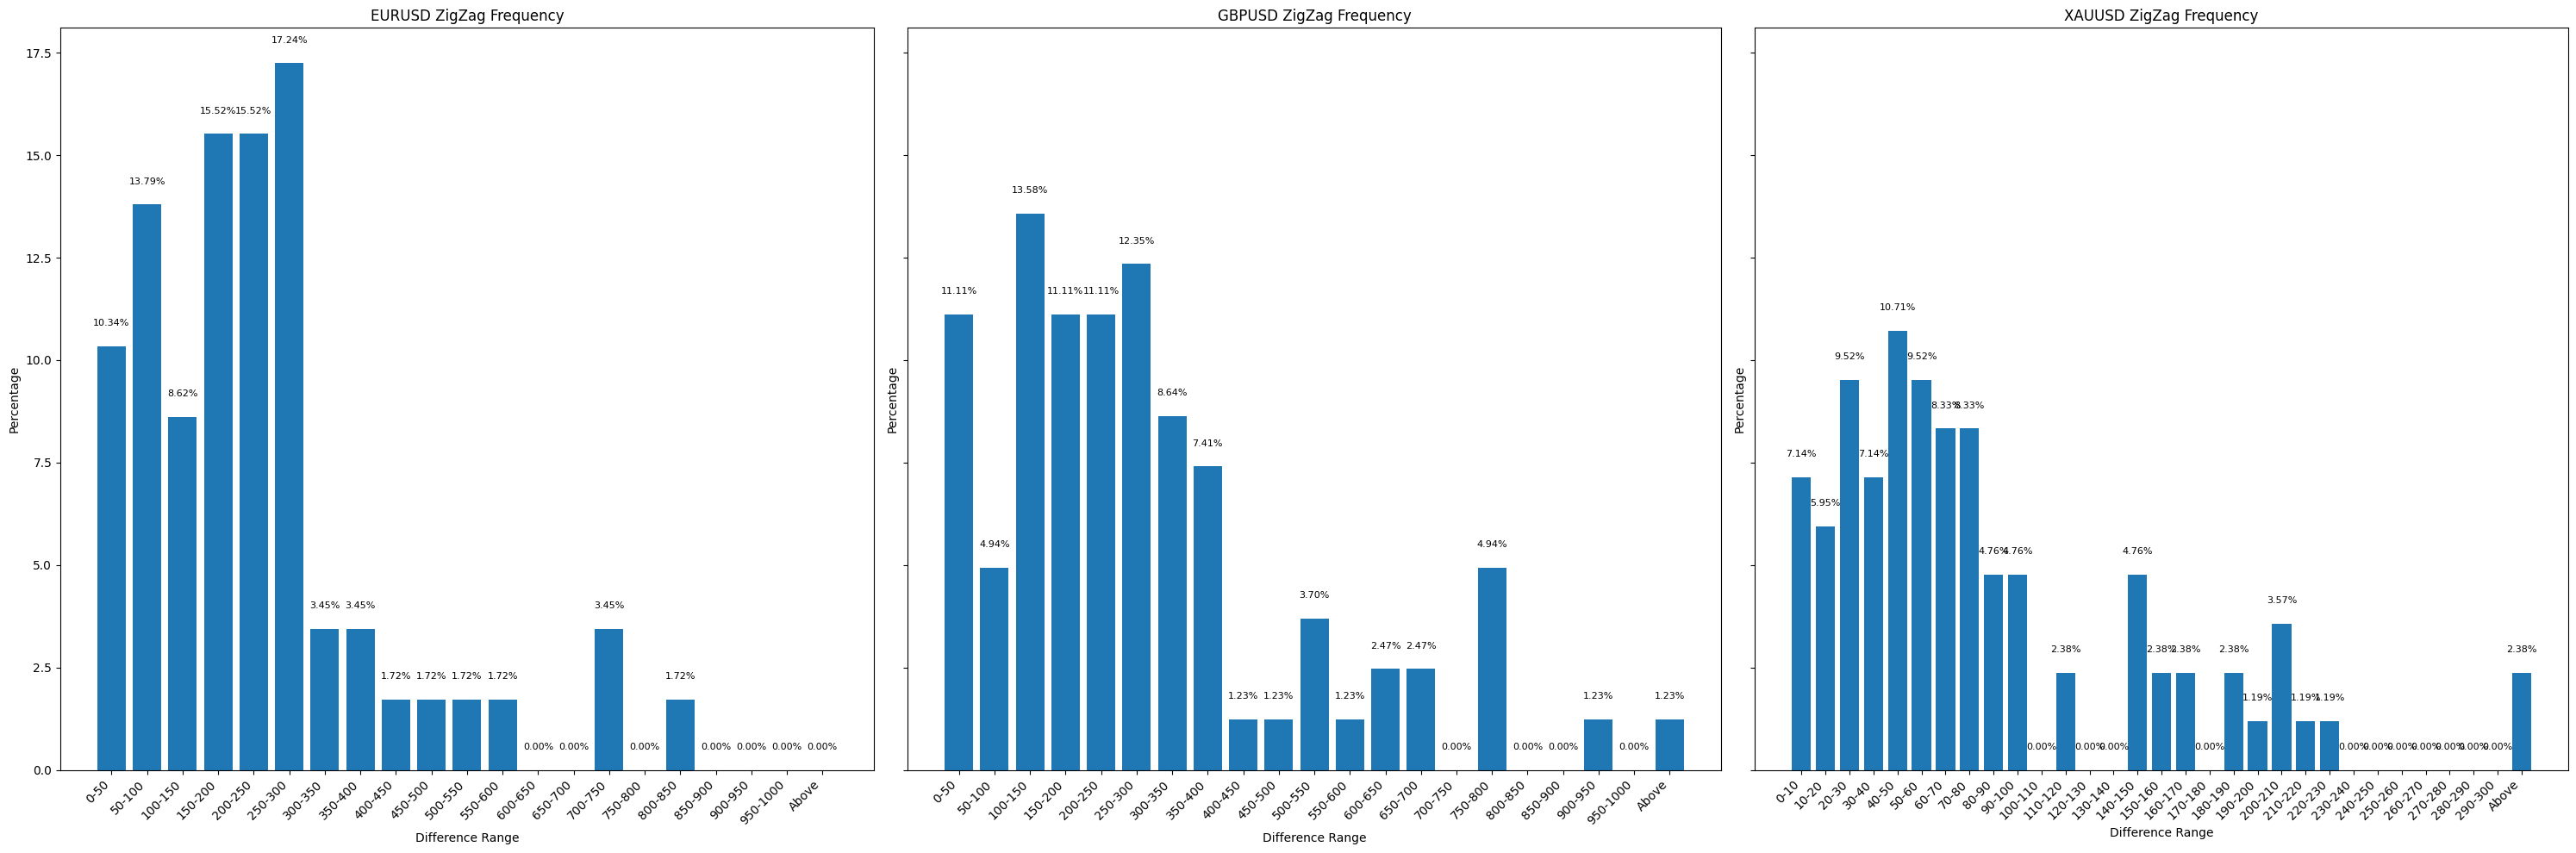

In [4]:
import matplotlib.pyplot as plt

# Store frequency data for each instrument
freq_data = {}

for ticker, name, percent, multiplier, unit in tickers:
    df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
    if df.empty:
        print(f"Failed to download data for {name}")
        continue
    close = df['Close'].dropna().reset_index(drop=True)
    pivots = zigzag(close, percent)
    zigzag_diffs = np.abs(np.diff(pivots)) * multiplier
    if name == "XAUUSD":
        bins = bins_xau
        labels = labels_xau
    else:
        bins = bins_fx
        labels = labels_fx
    zigzag_bins = pd.cut(zigzag_diffs, bins=bins, labels=labels, right=False)
    freq_counts = zigzag_bins.value_counts().sort_index()
    freq_percent = freq_counts / freq_counts.sum() * 100
    freq_data[name] = freq_percent

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
for idx, (name, freq_percent) in enumerate(freq_data.items()):
    ax = axes[idx]
    ax.bar(freq_percent.index.astype(str), freq_percent.values)
    ax.set_title(f"{name} ZigZag Frequency")
    ax.set_xlabel("Difference Range")
    ax.set_ylabel("Percentage")
    ax.set_xticklabels(freq_percent.index.astype(str), rotation=45, ha='right')
    for i, v in enumerate(freq_percent.values):
        ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=8)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3920753233.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3920753233.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-3920753233.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])


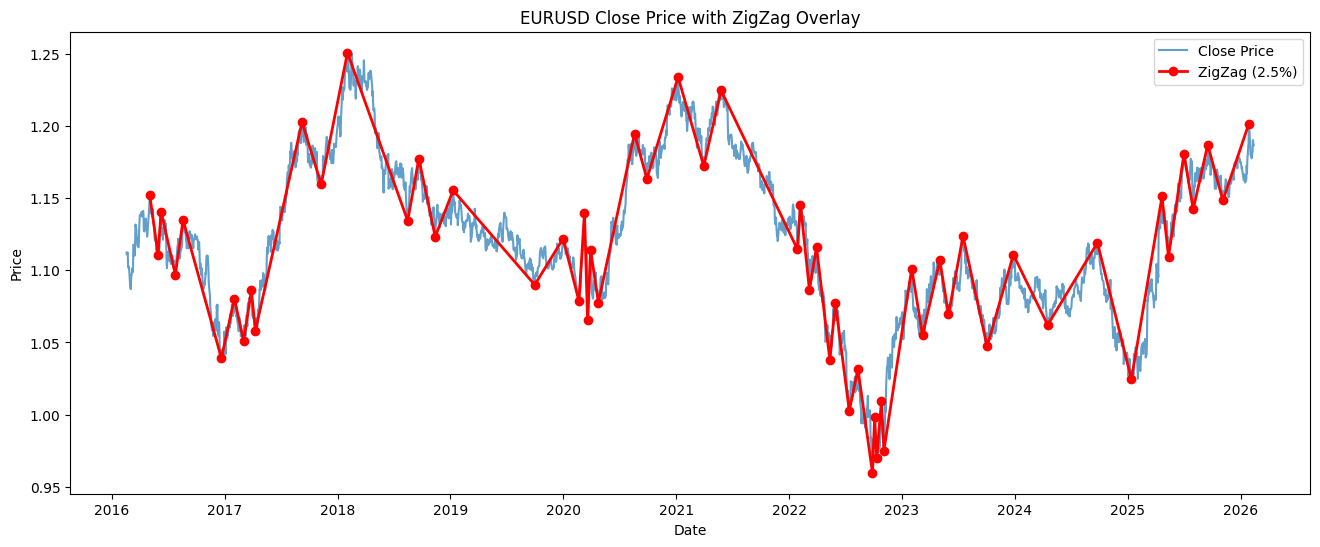

/tmp/ipython-input-3920753233.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3920753233.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-3920753233.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])


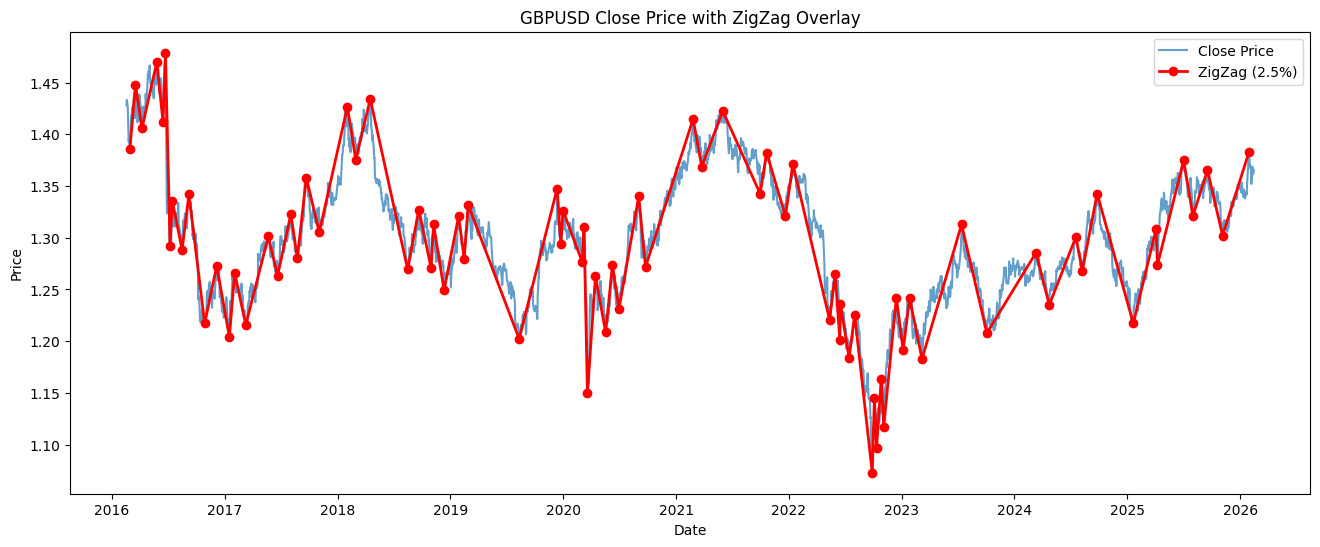

/tmp/ipython-input-3920753233.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3920753233.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_pivot = float(close.iloc[0])
/tmp/ipython-input-3920753233.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(close.iloc[i])


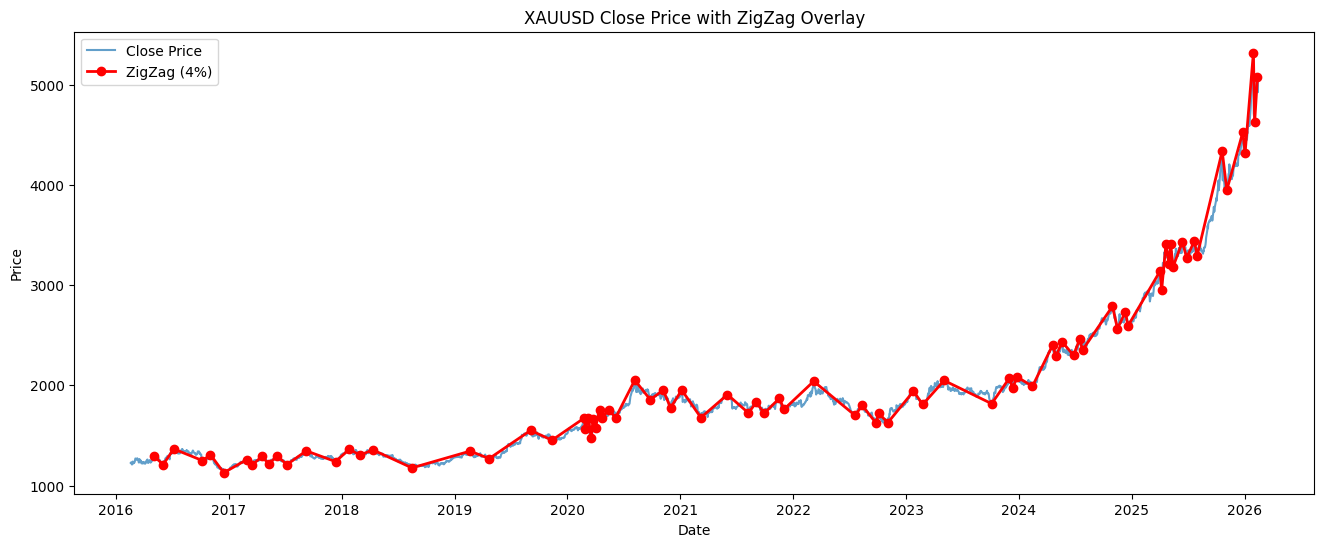

In [5]:
import matplotlib.pyplot as plt

for ticker, name, percent, multiplier, unit in tickers:
    df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
    if df.empty:
        print(f"Failed to download data for {name}")
        continue
    close = df['Close'].dropna()
    pivots_idx = []
    pivots_val = []
    # Re-run zigzag to get indices
    percent_zigzag = percent
    percent_zigzag = percent_zigzag / 100
    last_pivot = float(close.iloc[0])
    trend = 0
    for i in range(1, len(close)):
        current_price = float(close.iloc[i])
        change = (current_price - last_pivot) / last_pivot
        if trend == 0:
            if abs(change) >= percent_zigzag:
                trend = 1 if change > 0 else -1
                last_pivot = current_price
                pivots_idx.append(close.index[i])
                pivots_val.append(current_price)
        elif trend == 1:
            if current_price > last_pivot:
                last_pivot = current_price
                pivots_idx[-1] = close.index[i]
                pivots_val[-1] = current_price
            elif (last_pivot - current_price) / last_pivot >= percent_zigzag:
                trend = -1
                last_pivot = current_price
                pivots_idx.append(close.index[i])
                pivots_val.append(current_price)
        elif trend == -1:
            if current_price < last_pivot:
                last_pivot = current_price
                pivots_idx[-1] = close.index[i]
                pivots_val[-1] = current_price
            elif (current_price - last_pivot) / last_pivot >= percent_zigzag:
                trend = 1
                last_pivot = current_price
                pivots_idx.append(close.index[i])
                pivots_val.append(current_price)
    # Plot
    plt.figure(figsize=(16,6))
    plt.plot(close.index, close.values, label='Close Price', alpha=0.7)
    plt.plot(pivots_idx, pivots_val, 'ro-', label=f'ZigZag ({percent}%)', linewidth=2)
    plt.title(f"{name} Close Price with ZigZag Overlay")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
